In [1]:
import json

with open('C:/Users/Abdelahi/Desktop/genetaed_data/dataset.json') as file:
    data = json.load(file)


In [20]:
data['0']['tf_idf']
# return {'document_id': index, 'sentences': sentences, 'vectors': None, 'tf_idf': None, 'tokens': tokens}

{'283650': 0.24390321104782542,
 '79363': 0.04378931292539397,
 '206338': 0.03995886286442051,
 '47109': 0.21546066177979448,
 '236039': 0.08588948723588936,
 '324106': 0.208155289802075,
 '310795': 0.04162391442636876,
 '147980': 0.042776330257262615,
 '257037': 0.1420756678596996,
 '225293': 0.20968532812213275,
 '83982': 0.08112564989536043,
 '229902': 0.10243678336836677,
 '186890': 0.028769622633560914,
 '205324': 0.051844603569686835,
 '251923': 0.1551313484263434,
 '245269': 0.2152561359121677,
 '317465': -0.017969314885727998,
 '45082': 0.34499389320629703,
 '252955': 0.2153680459332199,
 '174110': 0.2777314977117079,
 '226846': 0.016641114227974294,
 '117281': 0.13380439265689764,
 '64548': 0.023544348833250225,
 '148517': 0.4753470120456216,
 '169511': 0.10581615976920343,
 '250919': 0.026089238541575785,
 '59947': 0.10192426364515811,
 '232492': 0.12843043062876386,
 '38958': 0.2209360453532313,
 '192560': 0.1437787689693591,
 '159794': 0.07547659343915403,
 '234035': 0.0339

In [2]:
import random
import time
import numpy as np

def generate_vector(i):
    vector_dict = data[str(i)]['tf_idf']
    vector = np.array([vector_dict.get(str(j), 0.0) for j in range(325936)], dtype=float)
    return vector

num_data = 1700

total_data = len(data)
selected_indices = random.sample(range(total_data), num_data)


vectors = [generate_vector(i) for i in selected_indices]

In [16]:
vectors[0][283650]

0.24390321104782542

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
def generate_vector(i):
    vector_dict = data[str(i)]['tf_idf']
    vector = np.array([vector_dict.get(str(j), 0.0) for j in range(325936)], dtype=float)
    return vector

vectors = np.array([generate_vector(i) for i in range(1700)])

tsne = TSNE(n_components=2)
vectors_2d = tsne.fit_transform(vectors)

#remove outliers
def remove_outliers(data, max_std_dev=3, max_outliers=100):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    def remove_outliers_row(row):
        return np.all(np.abs((row - mean) / std_dev) < max_std_dev)

    mask = np.array([remove_outliers_row(row) for row in data])    
    outlier_indices = np.where(~mask)[0][:max_outliers]
    data_cleaned = np.delete(data, outlier_indices, axis=0)
    
    return data_cleaned


#remove 200(10%) outliers
vectors_cleaned = remove_outliers(vectors_2d, max_outliers=200)

c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


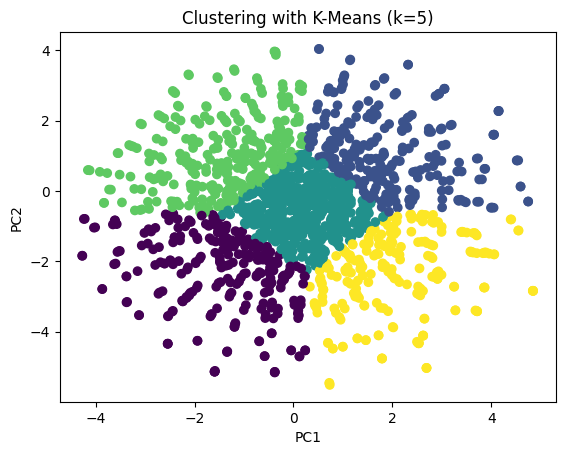

In [5]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(vectors_cleaned)
labels = kmeans.labels_

plt.scatter(vectors_cleaned[:, 0], vectors_cleaned[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Clustering with K-Means (k={k})')

plt.show()


c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


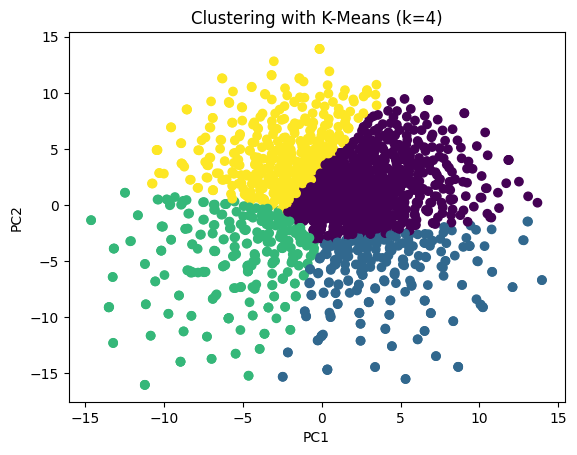

In [6]:

k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(vectors_cleaned)
labels = kmeans.labels_

plt.scatter(vectors_cleaned[:, 0], vectors_cleaned[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Clustering with K-Means (k={k})')

plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
def generate_vector(i):
    vector_dict = data[str(i)]['tf_idf']
    vector = np.array([vector_dict.get(str(j), 0.0) for j in range(325936)], dtype=float)
    return vector

vectors = np.array([generate_vector(i) for i in range(1700)])

tsne = TSNE(n_components=3)
vectors_2d = tsne.fit_transform(vectors)


def remove_outliers(data, max_std_dev=3, max_outliers=100):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    def remove_outliers_row(row):
        return np.all(np.abs((row - mean) / std_dev) < max_std_dev)
    mask = np.array([remove_outliers_row(row) for row in data])
    
    
    outlier_indices = np.where(~mask)[0][:max_outliers]
    
    
    data_cleaned = np.delete(data, outlier_indices, axis=0)
    
    return data_cleaned
vectors_cleaned = remove_outliers(vectors_2d, max_outliers=50)

## with just cleaning 50 of outliers datas :

c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


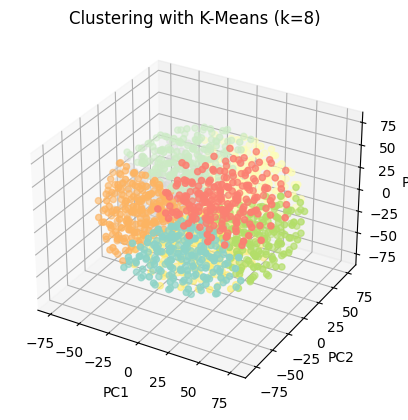

In [13]:
import matplotlib.pyplot as plt
k = 8
kmeans = KMeans(n_clusters=k)
kmeans.fit(vectors_cleaned)
labels = kmeans.labels_
colors = plt.get_cmap('Set3').colors


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vectors_cleaned[:, 0], vectors_cleaned[:, 1], vectors_cleaned[:, 2], c=labels, cmap='Set3')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title(f'Clustering with K-Means (k={k})')

plt.show()

c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


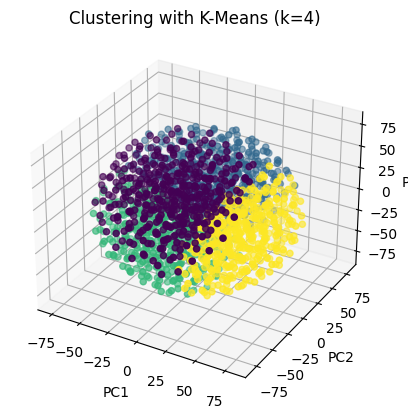

In [7]:
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(vectors_cleaned)
labels = kmeans.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vectors_cleaned[:, 0], vectors_cleaned[:, 1], vectors_cleaned[:, 2], c=labels, cmap='viridis')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title(f'Clustering with K-Means (k={k})')

plt.show()

c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\

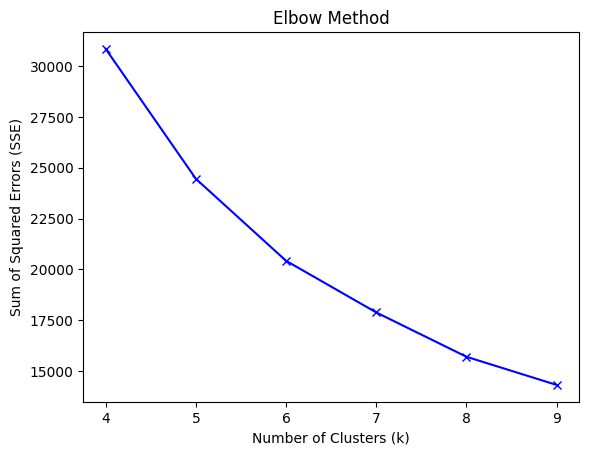

In [8]:
from sklearn.cluster import KMeans

k_values = range(4, 10)
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vectors_cleaned)
    sse.append(kmeans.inertia_)

# رسم نمودار elbow
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()